## TIME SERIES FORECASTING

The notebook is the implementation of the study of time series forcasting.
The monthly sales of the chanpange sales is used as the dataset and the future sales of the champange is predicted.
ARIMA and SARIMA models are implemented in the study.
Non Stationary data is converted to stationary data.
Dickey Fuller Test is implemeted and the forecated sales are visualized.

# Importing necessary Libraries  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the dataset

In [5]:
df = pd.read_csv(r'C:\Users\Ash\Downloads\perrin-freres-monthly-champagne.csv')

In [6]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [9]:
df.tail(3)

,Month,Perrin Freres monthly champagne sales millions ?64-?72
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


# Data Cleaning 
Removing NaN value rows

In [14]:
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [27]:
df.drop(index=df.index[-1], 
        axis=0, 
        inplace=True)

In [26]:
df.tail(3)

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


# Convert Month into Datetime

In [28]:
df['Month']=pd.to_datetime(df['Month'])

In [29]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


# Setting of Index
"Month" is set as the index.

In [30]:
df.set_index('Month',inplace=True)

In [31]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


# Display of statistical data values

In [32]:
df.describe()

,Sales
count,103.000000
mean,4782.825243
std,2554.533523
min,1573.000000
25%,3137.500000
50%,4217.000000
75%,5216.000000
max,13916.000000


# DATA VISUALIZATION

<AxesSubplot:xlabel='Month'>

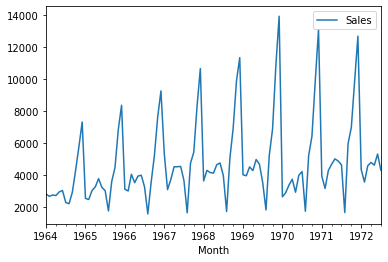

In [33]:
df.plot()

# Testing For Stationarity

In [34]:
from statsmodels.tsa.stattools import adfuller

In [35]:
test_result=adfuller(df['Sales'])

# IMPLEMENTATION OF HYPOTHESIS TESTING

Ho: It is non stationary

H1: It is stationary

In [36]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [37]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.7308289344450154
p-value : 0.4153025444047705
#Lags Used : 11
Number of Observations Used : 91
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# DIFFERENCING

In [38]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [39]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-03-01    3564.0
1972-04-01    4577.0
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
Name: Sales, Length: 103, dtype: float64

In [40]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [41]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [42]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.58136386387413
p-value : 2.6765083127818585e-11
#Lags Used : 0
Number of Observations Used : 90
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

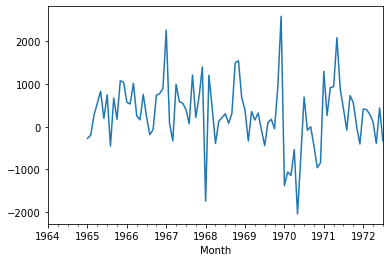

In [43]:
df['Seasonal First Difference'].plot()

# AUTO REGRESSIVE MODEL

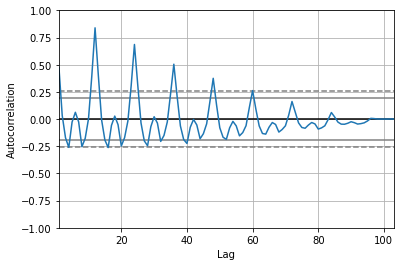

In [45]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [48]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

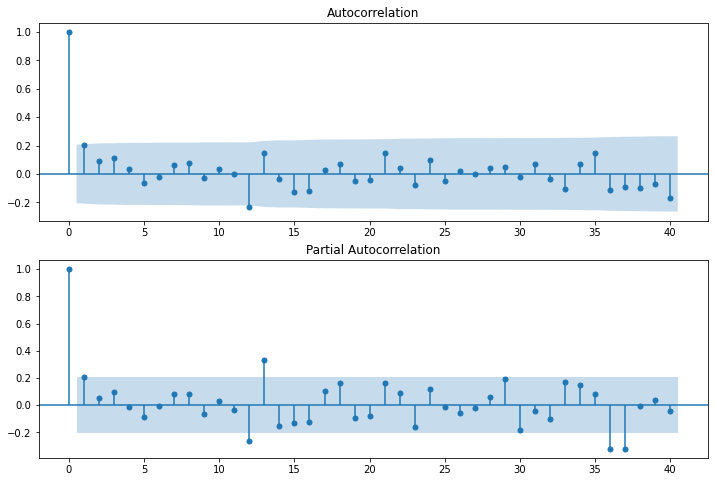

In [49]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

# For non-seasonal data

p=1, d=1, q=0 or 1

In [50]:
from statsmodels.tsa.arima_model import ARIMA

In [51]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

C:\Users\Ash\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Ash\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will b

In [52]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  102
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -932.014
Method:                       css-mle   S.D. of innovations           2208.935
Date:                Wed, 16 Feb 2022   AIC                           1872.029
Time:                        00:12:57   BIC                           1882.529
Sample:                    02-01-1964   HQIC                          1876.281
                         - 07-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            24.6214     12.727      1.935      0.053      -0.324      49.567
ar.L1.D.Sales     0.4376      0.090      4.846      0.000       0.261       0.615
ma.L1.D.Sales    -1.0000      0.026    -38.509      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.2854           +0.0000j            2.2854            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Month'>

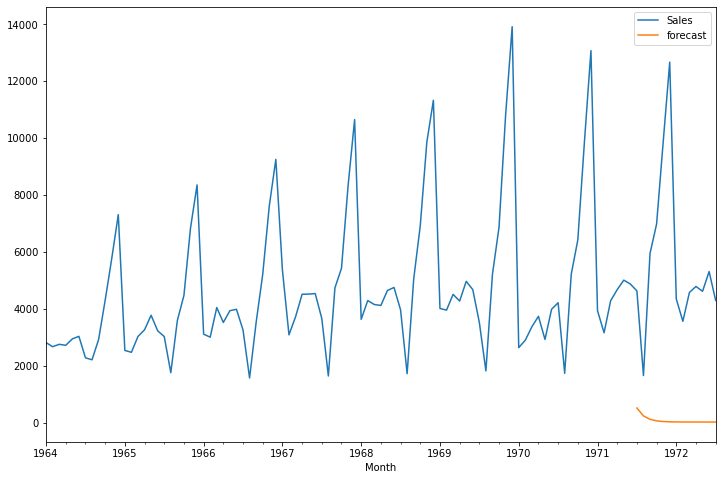

In [53]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [54]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\Ash\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Ash\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Month'>

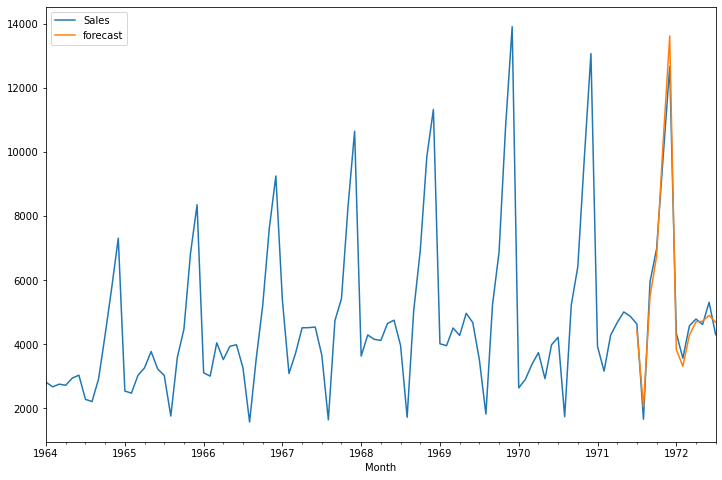

In [55]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

# Implementation of Dataoffset for Forecasting

In [56]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [57]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [58]:
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-02-01,NaN,NaN,NaN,NaN
1974-03-01,NaN,NaN,NaN,NaN
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN


In [59]:
future_df=pd.concat([df,future_datest_df])

# Result of the forecast

C:\Users\Ash\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot:>

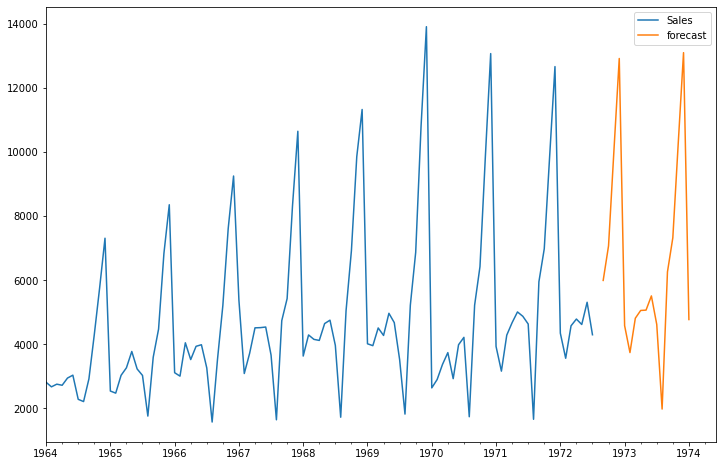

In [60]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 